# Exploratory Data Analysis Starter
---
## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Loading data with Pandas

In [2]:
client_df = pd.read_csv('./Client_Data.csv')
price_df = pd.read_csv('./Price_Data.csv')

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.shape

(14606, 26)

In [6]:
price_df.shape

(193002, 8)

---

## Data Summary

### Data types

In [7]:
datecolumn = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]

In [8]:
for i in datecolumn:
  client_df[i] = pd.to_datetime(client_df[i])

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
price_df.head(20)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


### Statistical Analysis of Data

In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Checking Missing Values

In [14]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [15]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

---

## Data visualization

### Distribution of Numeric Variables

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

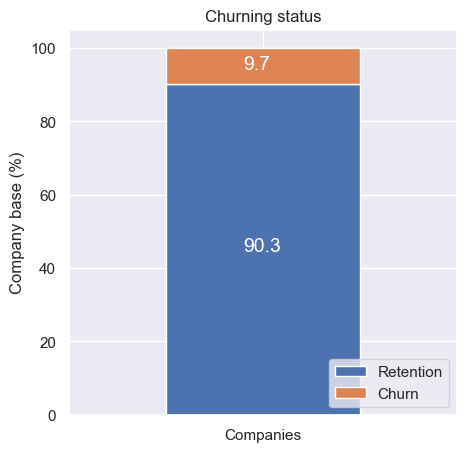

In [17]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

As we can see among the total customers, around 9.7% have stopped their business with Power Co. Now we have to find ways to reduce the churn in order to obtain efficient profit w/o minimal loss as much as possible. For that, first we need to find the feature that affects the churn, so that later by finding the ways to manipulate it, we can save our customers for long term

In [18]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

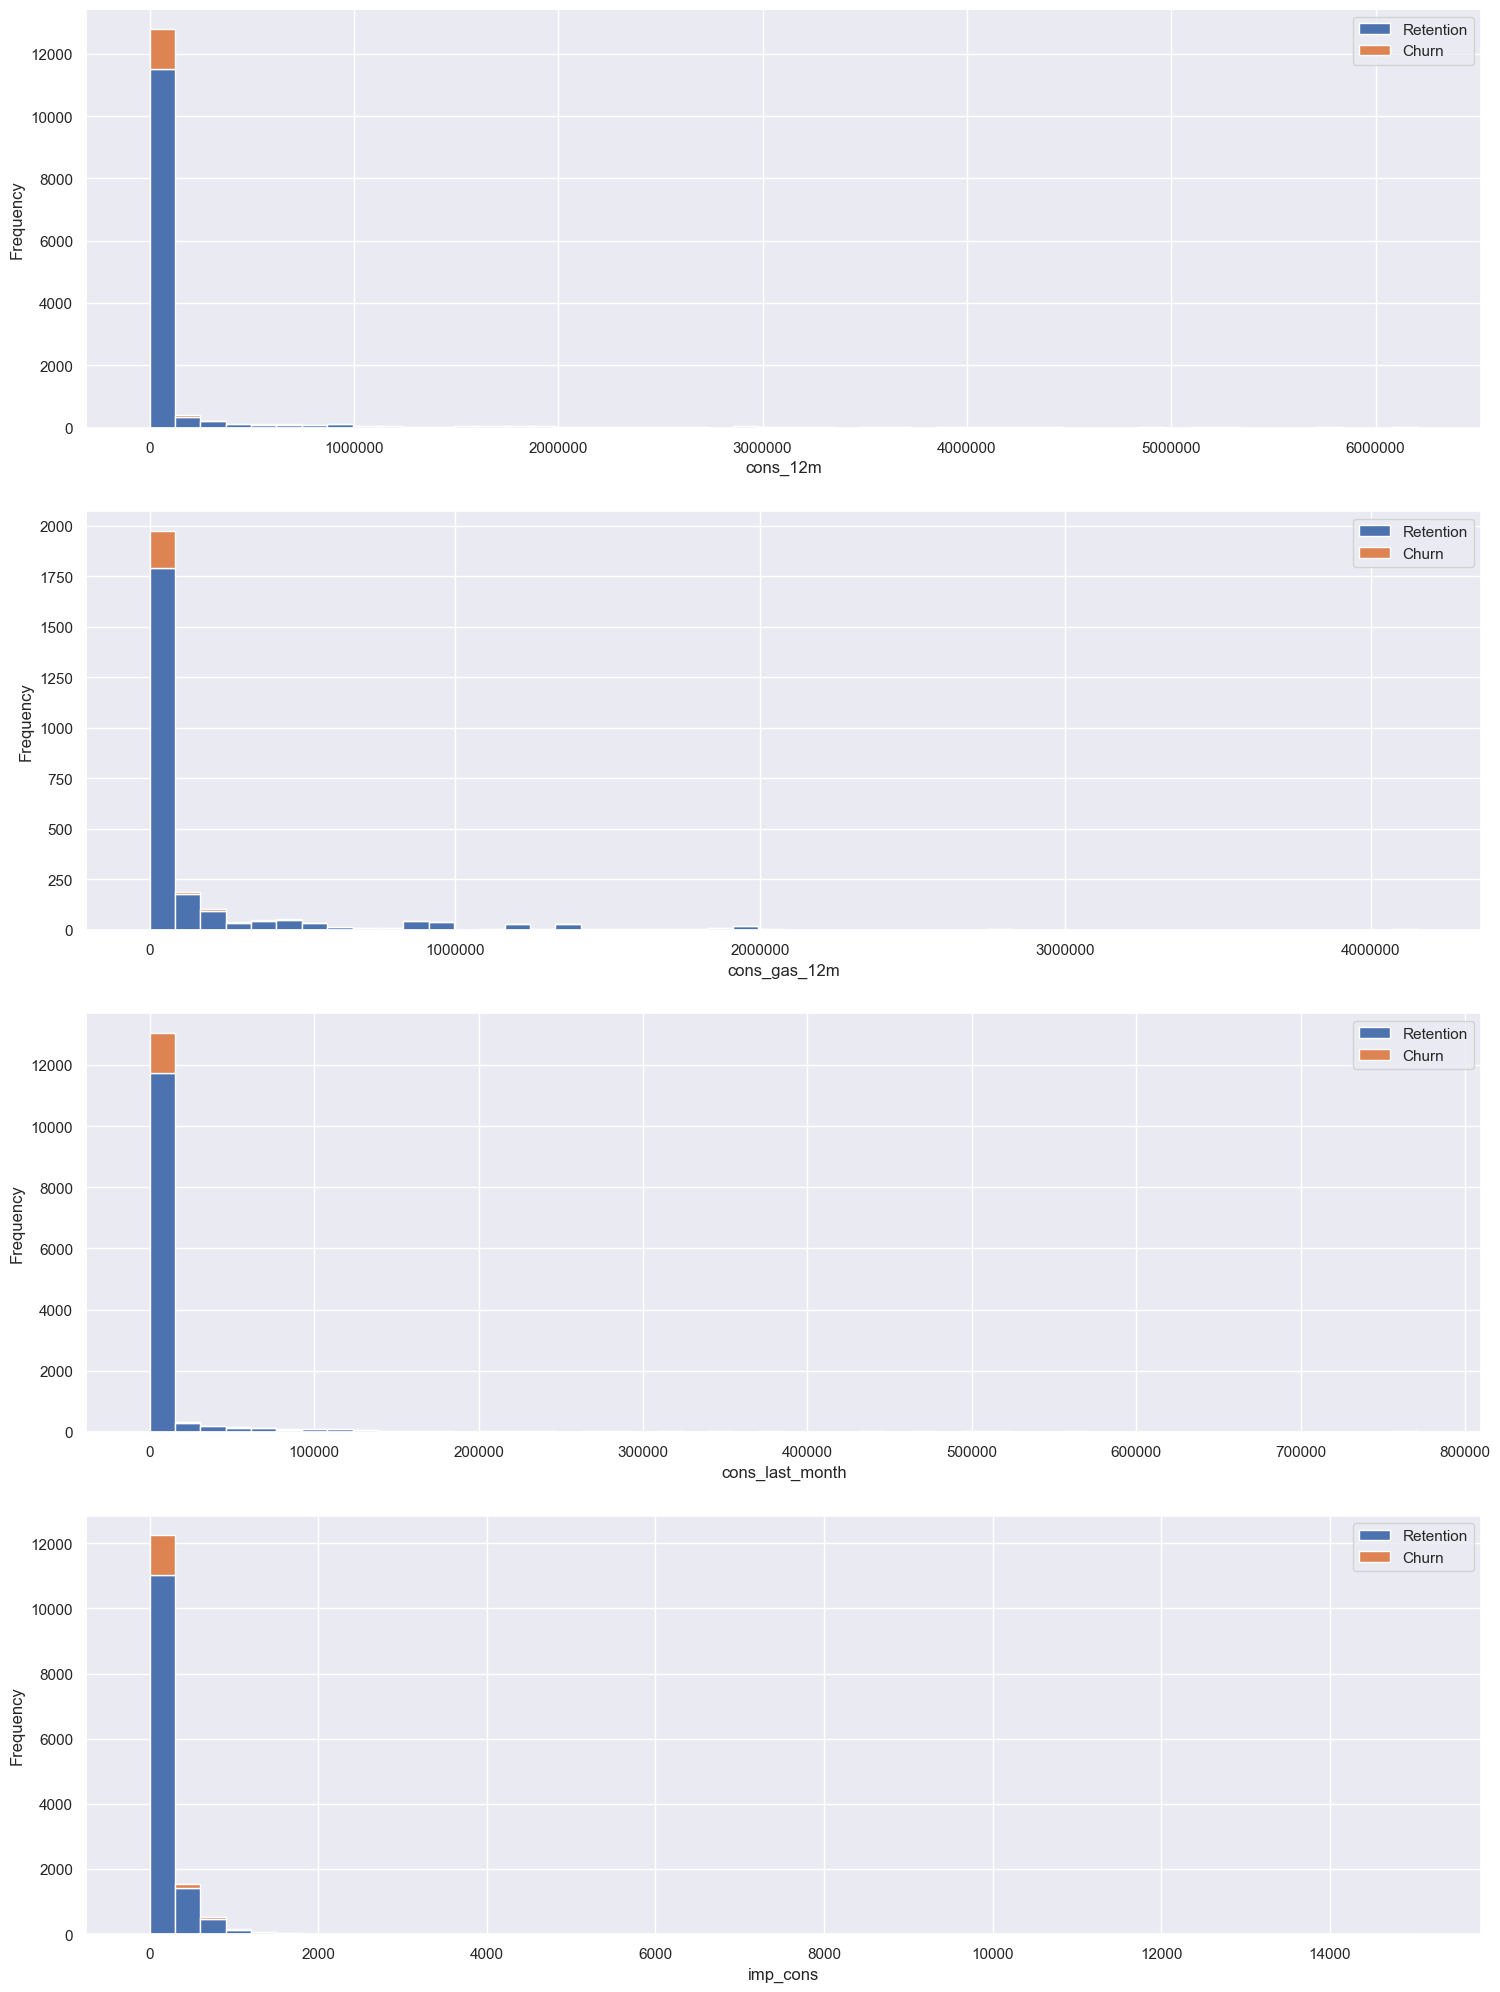

In [19]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

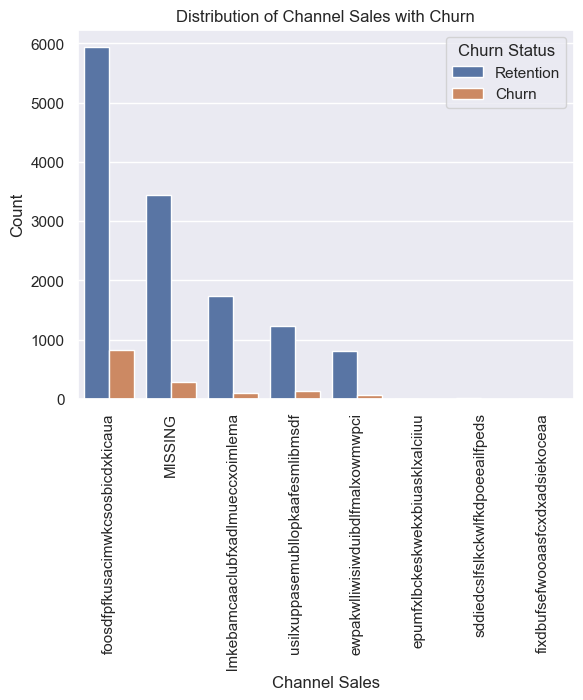

In [20]:
# Define the label mapping
label_mapping = {0: 'Retention', 1: 'Churn'}

# Stack the bars with churn == 1 as churn and churn == 0 as retention with hue
sns.countplot(data=client_df, x='channel_sales', hue='churn', hue_order=label_mapping)
plt.title('Distribution of Channel Sales with Churn')
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Churn Status', labels=['Retention', 'Churn'])
plt.show()

In [21]:
# # Define the label mapping
# label_mapping = {0: 'Retention', 1: 'Churn'}

# # Stack the bars with churn == 1 as churn and churn == 0 as retention with hue
# sns.countplot(data=client_df, x='origin_up', hue='churn', hue_order=label_mapping)
# plt.title('Distribution of Channel Sales with Churn')
# plt.xlabel('Channel Sales')
# plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.legend(title='Churn Status', labels=['Retention', 'Churn'])
# plt.show()

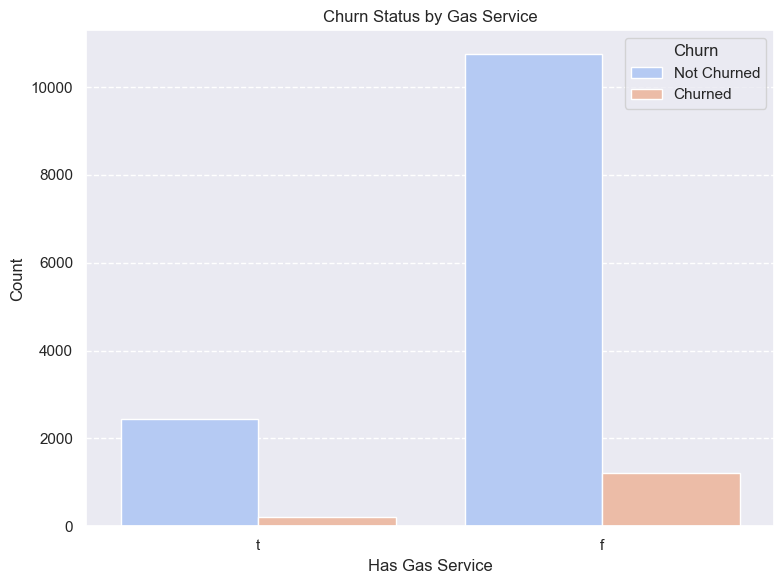

In [22]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=client_df, x='has_gas', hue='churn', palette='coolwarm')
plt.title('Churn Status by Gas Service')
plt.xlabel('Has Gas Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

- The data indicates that customers who have chosen to purchase multiple products from the same company exhibit a lower rate of churn compared to those who have only opted for a single product. In other words, the likelihood of these multi-product customers discontinuing their use of the company's services or products is significantly reduced. 

- This trend suggests that engagement with a wider array of the company's offerings creates a stronger customer-company relationship, fostering greater loyalty and reducing the propensity to switch to a competitor. The variety and interconnectedness of multiple products likely provide added value and convenience, making customers more reluctant to leave.

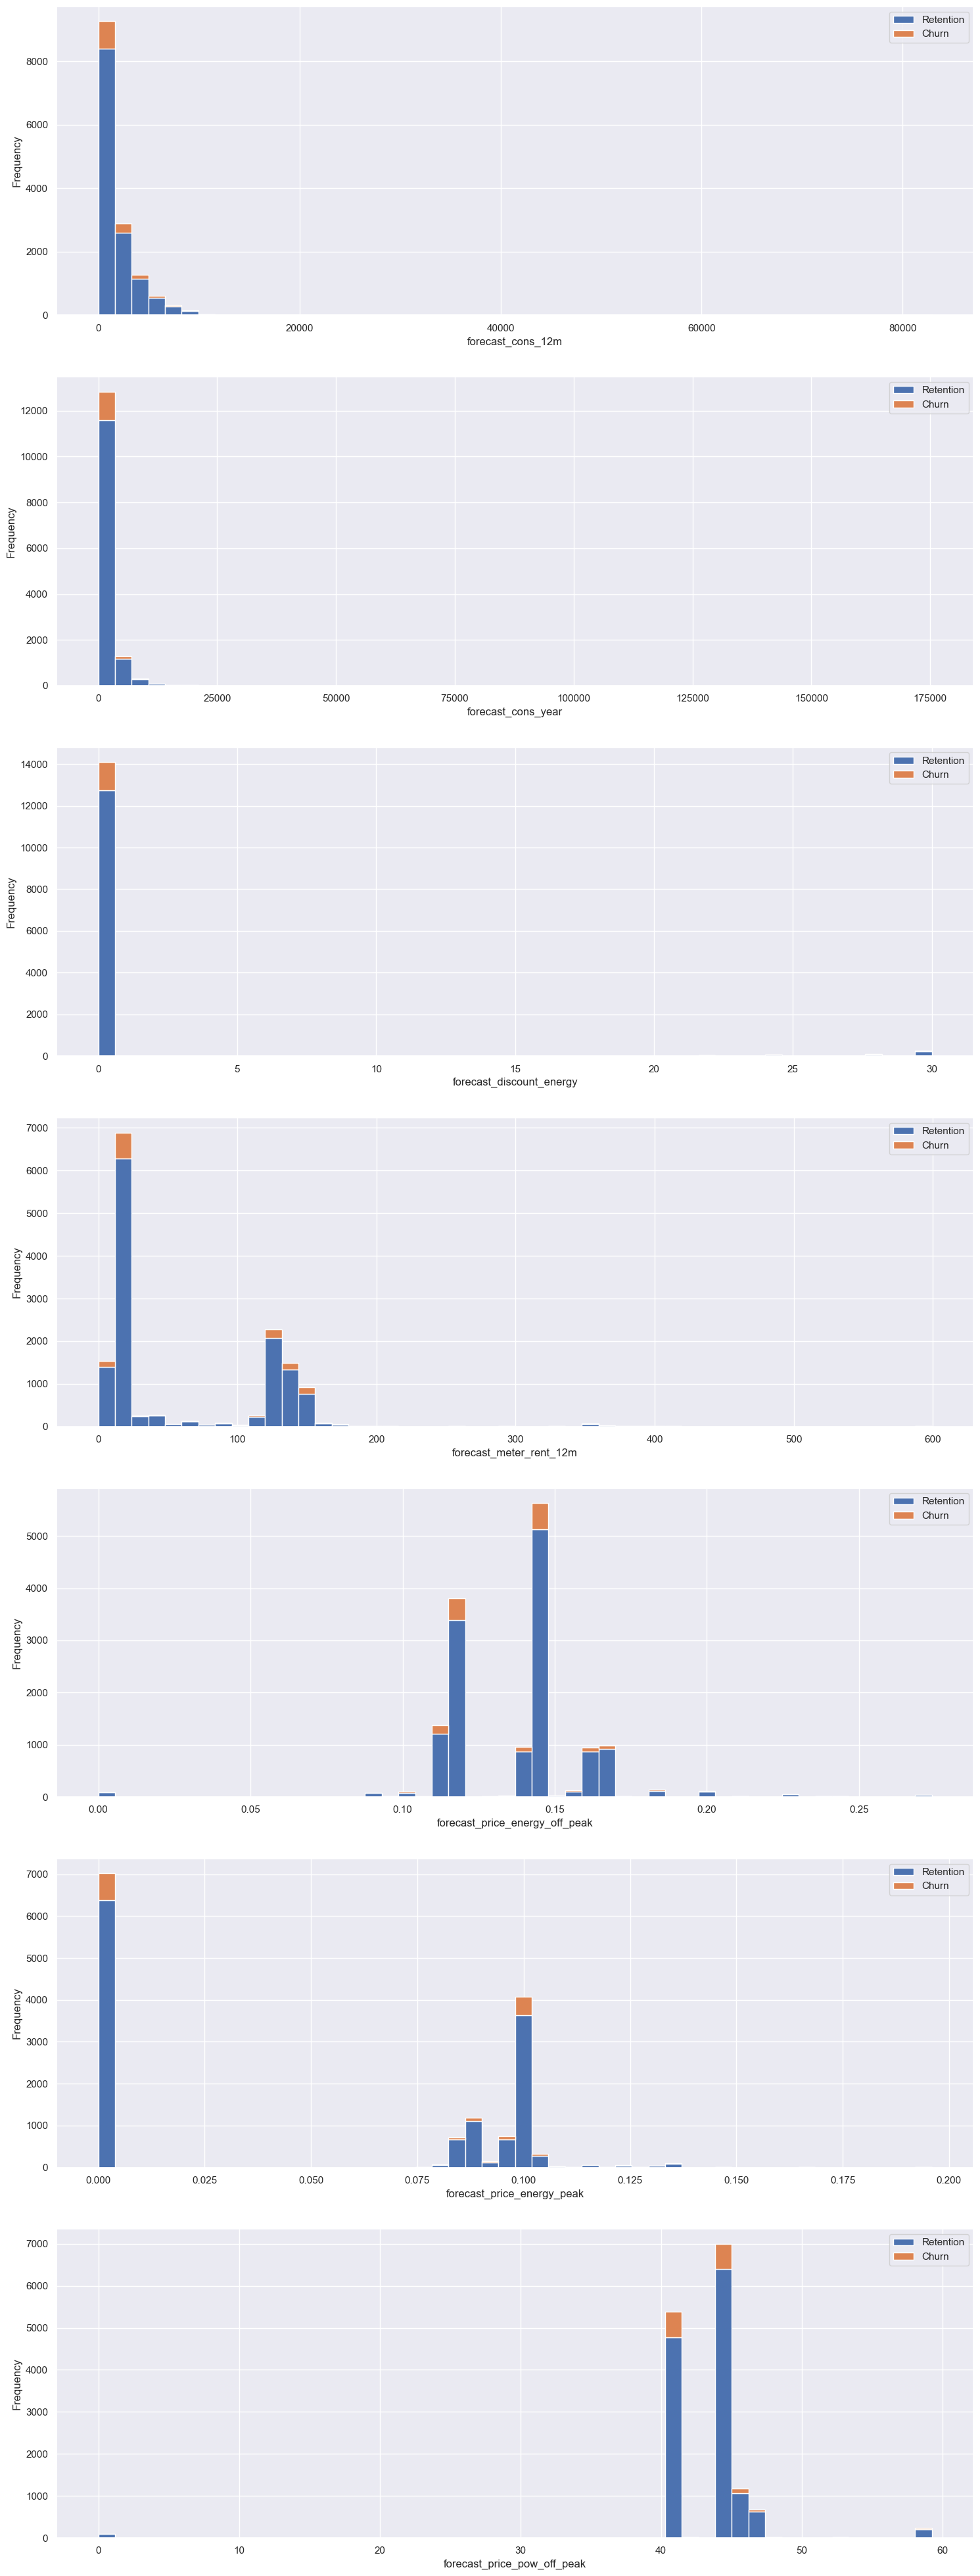

In [23]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

### Checking for Skewness and Outliers

#### Outliers for Past Usage by Costumers

In [24]:
pastusage = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]

In [25]:
skewness = pastusage.skew()
skewness

cons_12m            5.997308
cons_gas_12m        9.597530
cons_last_month     6.391407
imp_cons           13.198799
dtype: float64

<Figure size 1200x800 with 0 Axes>

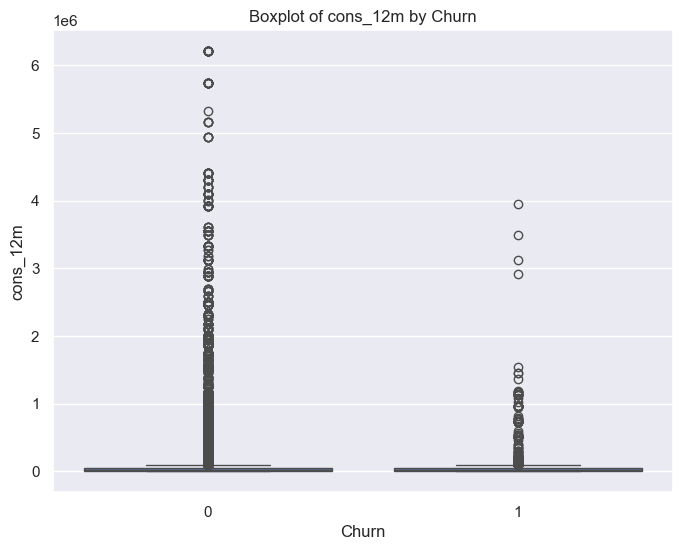

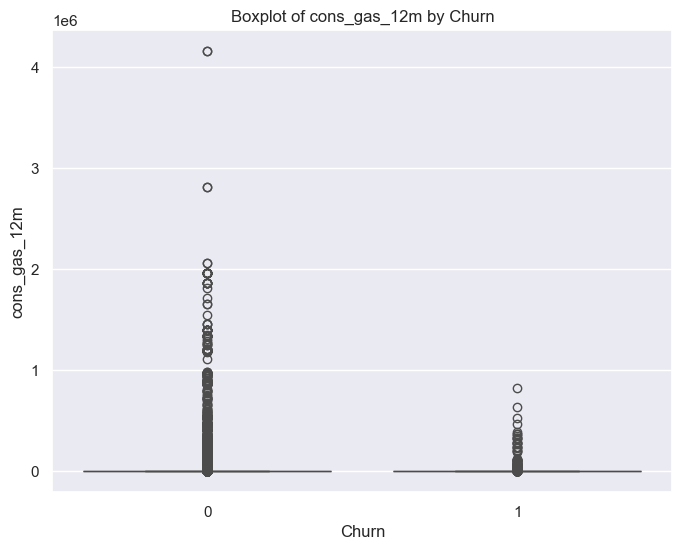

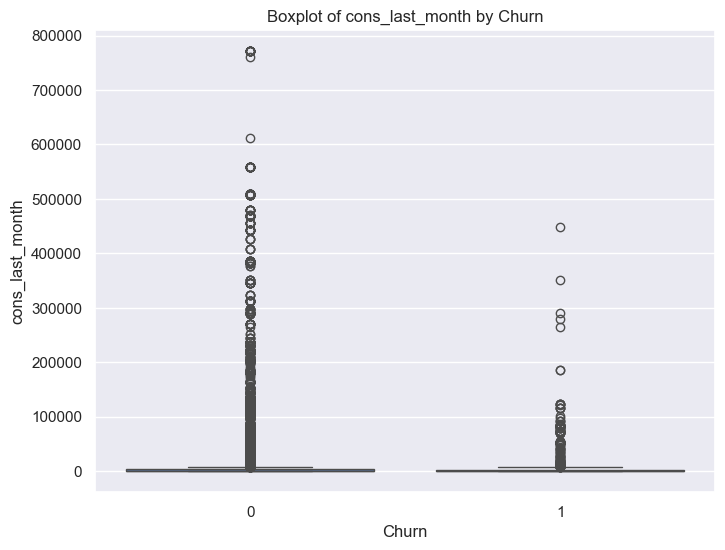

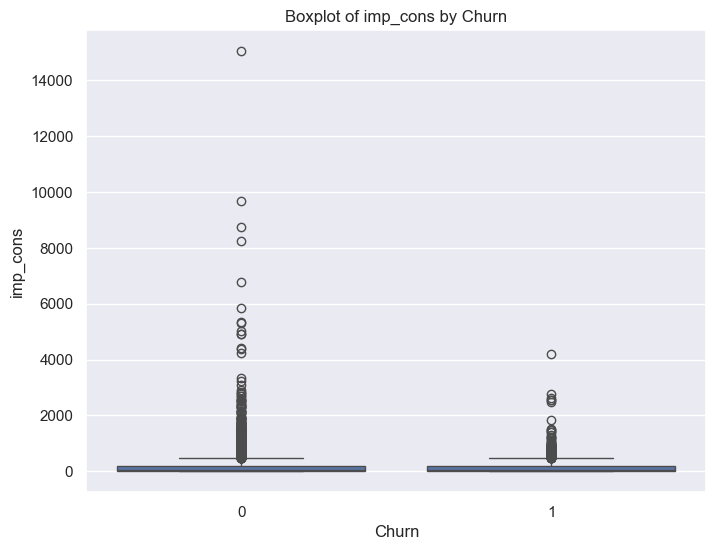

In [26]:
# Plot boxplots for each pastusage column, grouped by churn
plt.figure(figsize=(12, 8))
for col in pastusage.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y=col, data=client_df)
    plt.title(f'Boxplot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


#### Outliers for Forecasted Usage by constumers

In [27]:
forecastusage = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

<Figure size 1200x800 with 0 Axes>

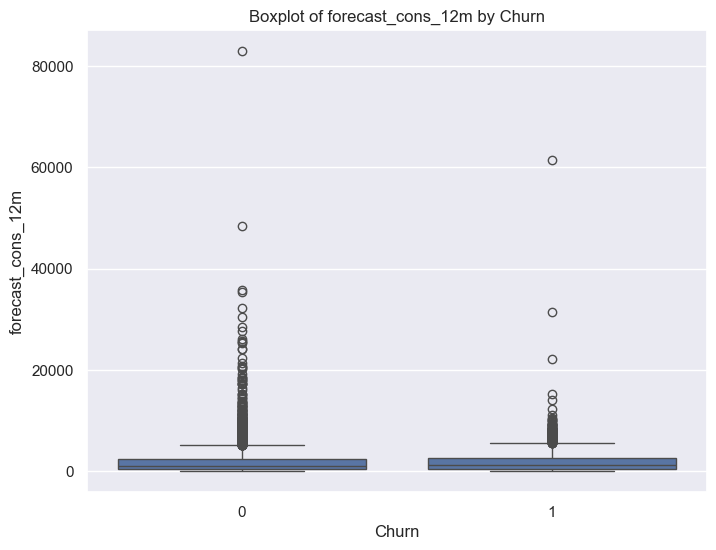

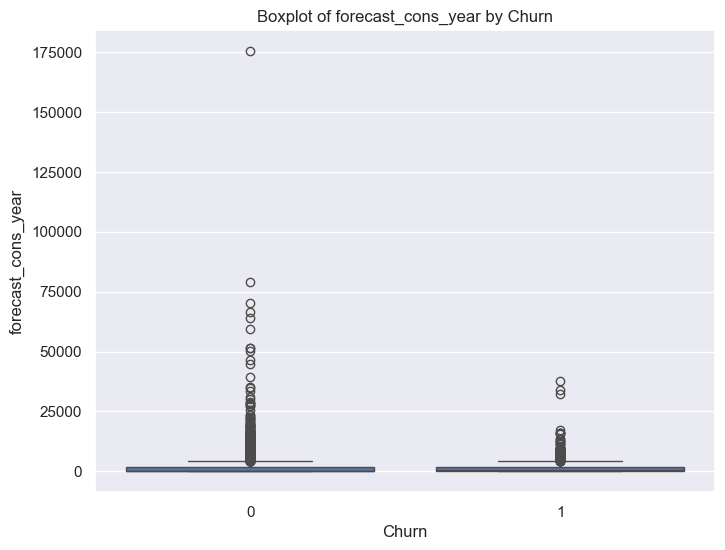

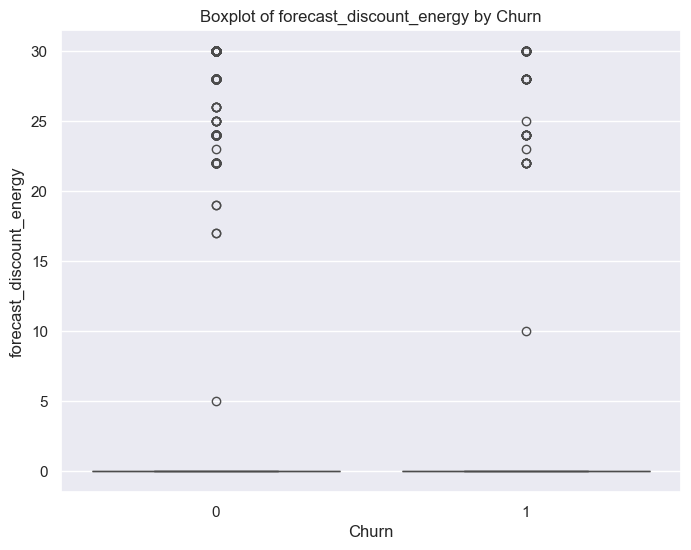

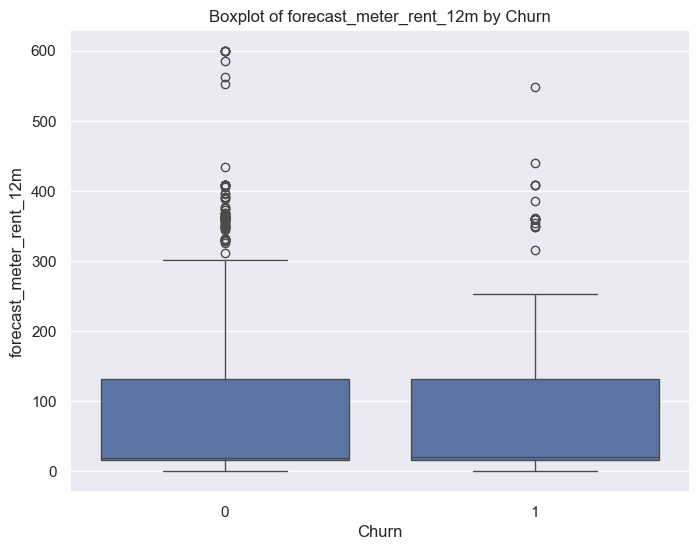

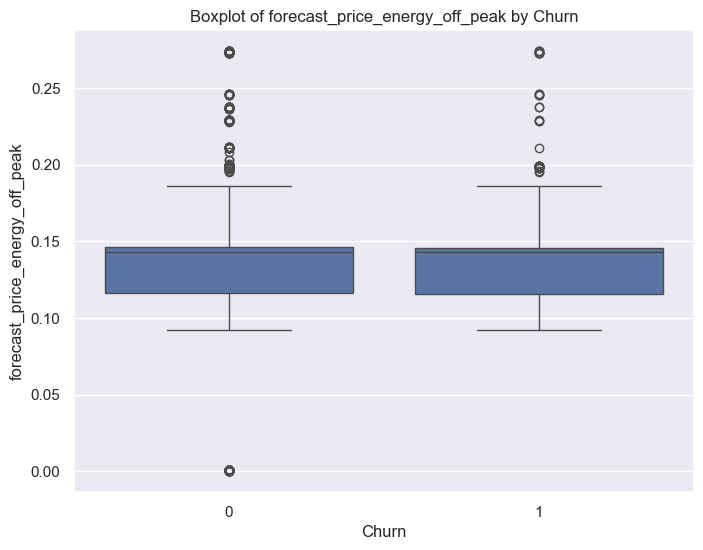

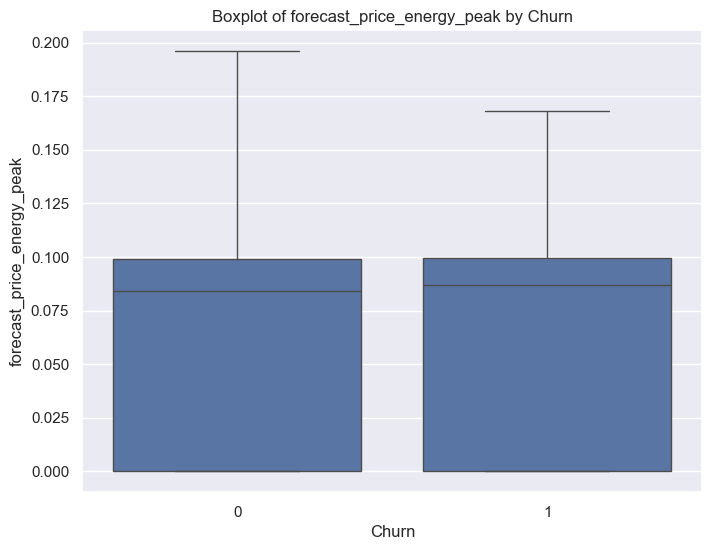

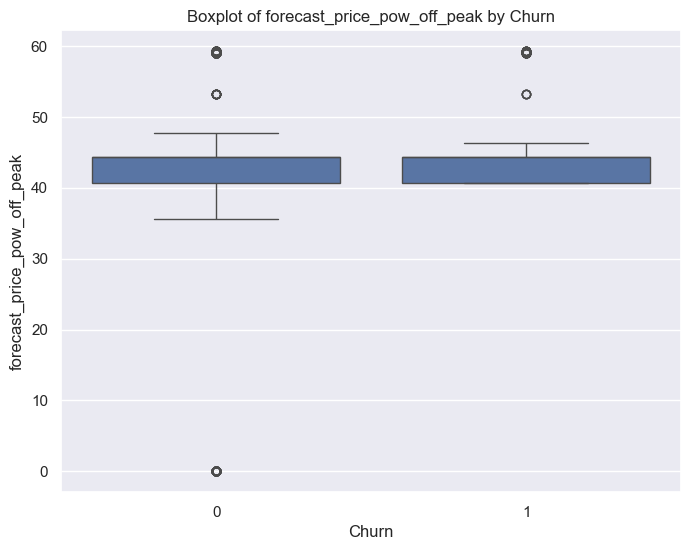

In [28]:
plt.figure(figsize=(12, 8))
for col in forecastusage.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y=col, data=client_df)
    plt.title(f'Boxplot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

### Checking for Missing and Inconsistent categories

In [29]:
# Check for missing values in categorical variables
print("Missing values in categorical variables:")
print(client_df.select_dtypes(include=['object']).isnull().sum())

# Check unique categories and their frequencies for categorical variables
categorical_cols = client_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique categories for {col}:")
    print(client_df[col].value_counts())
    print()

Missing values in categorical variables:
id               0
channel_sales    0
has_gas          0
origin_up        0
dtype: int64
Unique categories for id:
id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: count, Length: 14606, dtype: int64

Unique categories for channel_sales:
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Na

In [30]:
for i in price_df.columns:
    print(price_df[i].value_counts().value_counts())
    

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64
count
16094    2
16085    2
16082    2
16090    1
16087    1
16080    1
16079    1
16074    1
16070    1
Name: count, dtype: int64
count
2      189
1      170
3      164
5      128
4       81
      ... 
384      1
386      1
389      1
393      1
188      1
Name: count, Length: 320, dtype: int64
count
2      119
1      111
3      105
5       90
4       53
      ... 
273      1
270      1
269      1
268      1
153      1
Name: count, Length: 229, dtype: int64
count
1      67
2      63
5      46
3      45
4      33
       ..
226     1
220     1
214     1
211     1
126     1
Name: count, Length: 199, dtype: int64
count
1        8
2        6
3        5
5        3
11       3
4        2
7        2
10       2
16       2
8        1
9        1
34768    1
13       1
15       1
19       1
36       1
44       1
50       1
58       1
77       1
138      1
38491    1
226      1
284      1
33151   

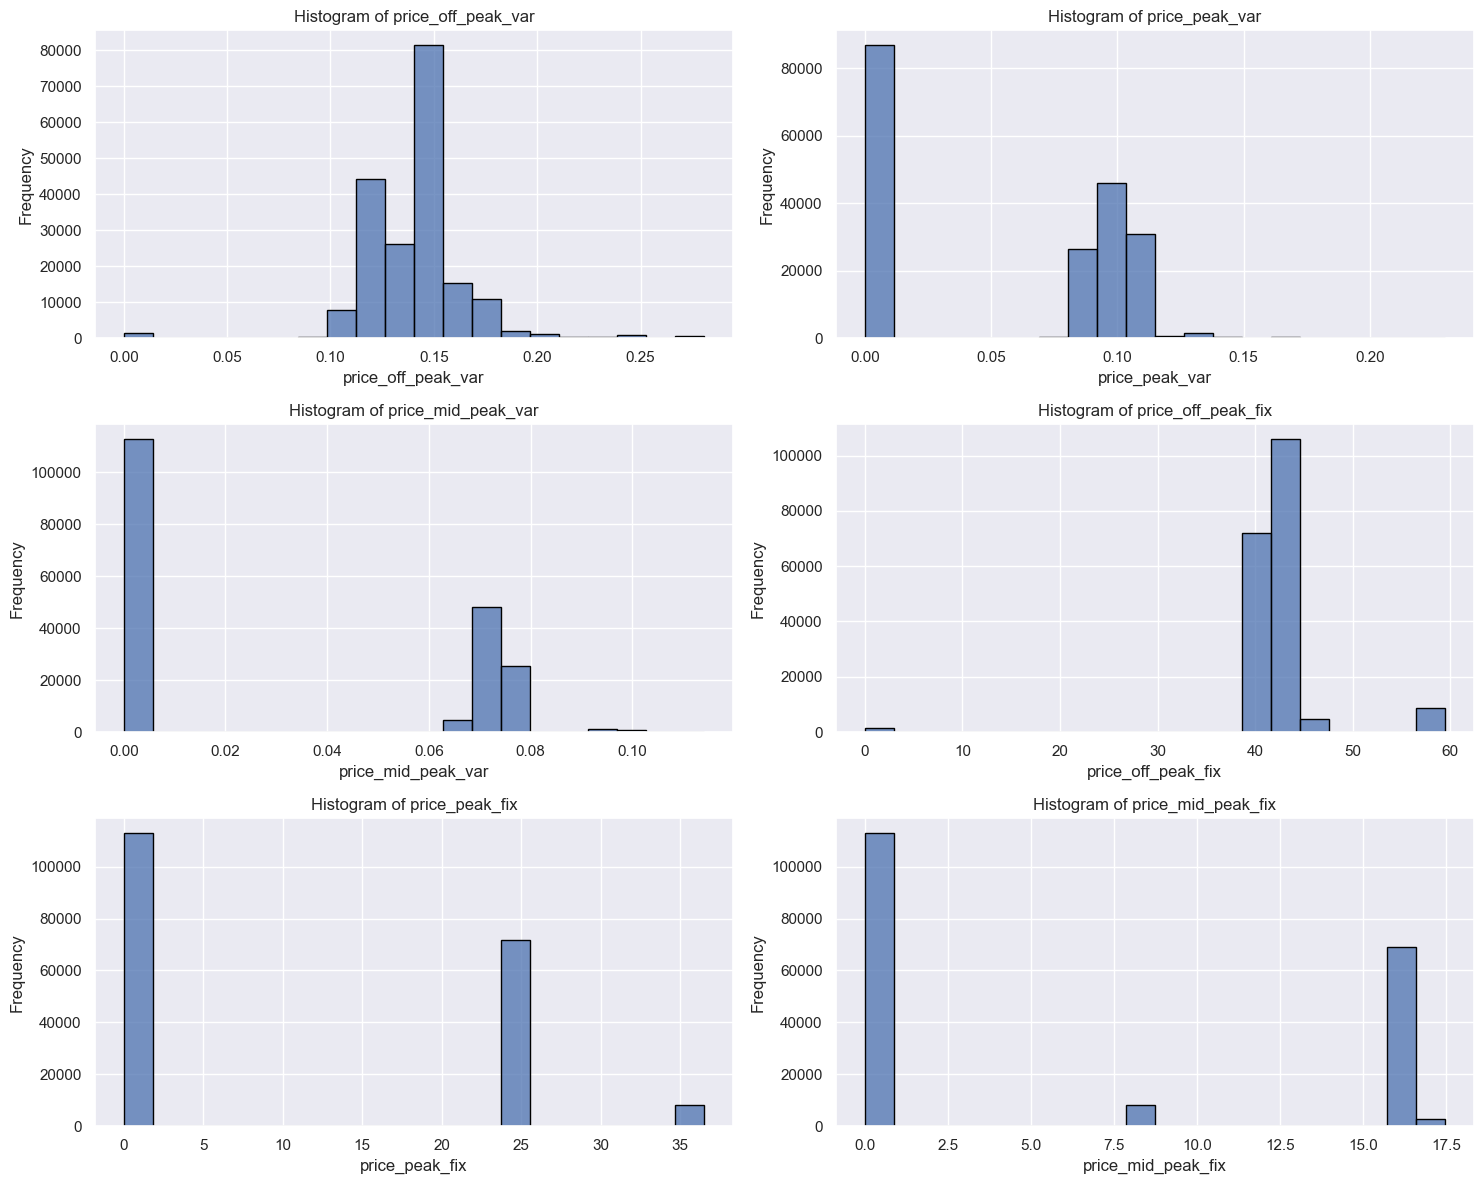

In [31]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']):
    ax = axes[i]
    sns.histplot(data=price_df, x=col, bins=20, edgecolor='black', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any extra subplots
for i in range(len(price_df.columns), 3 * 2):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

- Given that off-peak prices have the highest values, it is evident that these periods are crucial for analysis. The other pricing conditions, which show zero as their maximum occurrence, do not significantly impact our overall pricing strategy. Therefore, our focus should be on optimizing and leveraging off-peak pricing to maximize revenue and efficiency. 

- This insight highlights the importance of off-peak times in our pricing model, suggesting that they drive more substantial revenue or engagement compared to other periods where pricing conditions are negligible or ineffective.

### Time Frame Analysis

By analyzing the time frame during which maximum churn occurred, we can identify patterns that reveal why and when customers are most likely to leave. This insight is valuable for developing strategies to mitigate churn and understanding periodic fluctuations in the customer base. However, it's important to consider that each customer’s tenure with the company varies. Some may churn quickly after joining, while others may stay for longer periods before leaving. Recognizing these differences in customer lifecycles can help tailor retention strategies to different segments, ensuring more personalized and effective interventions that address the specific needs and behaviors of various customer groups. This nuanced approach allows the company to better anticipate and reduce churn, enhancing overall customer retention.

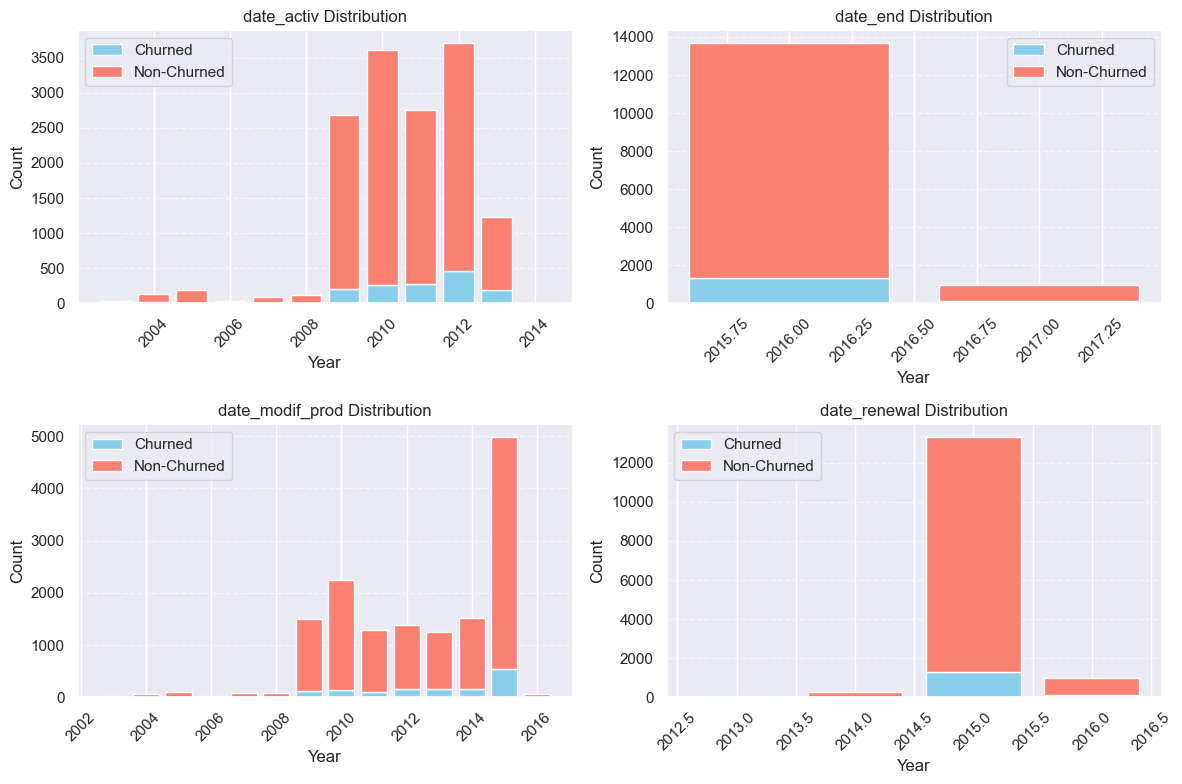

In [32]:
# Create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

# Define colors for churned and non-churned clients
colors = ['skyblue', 'salmon']  # Churned, Non-Churned

# Plot each date column
for i, col in enumerate(datecolumn):
    # Extract year from date column
    client_df[col + '_year'] = client_df[col].dt.year
    
    # Get unique years across all clients
    all_years = sorted(client_df[col + '_year'].unique())
    
    # Initialize counts for churned and non-churned clients for each year
    churn_counts = {year: 0 for year in all_years}
    nonchurn_counts = {year: 0 for year in all_years}
    
    # Update counts for churned clients
    churn_mask = client_df['churn'] == 1
    churn_grouped = client_df[churn_mask][col + '_year'].value_counts().sort_index()
    for year, count in churn_grouped.items():
        churn_counts[year] = count
    
    # Update counts for non-churned clients
    nonchurn_mask = client_df['churn'] == 0
    nonchurn_grouped = client_df[nonchurn_mask][col + '_year'].value_counts().sort_index()
    for year, count in nonchurn_grouped.items():
        nonchurn_counts[year] = count
    
    # Plot the distribution for churned clients
    axs[i].bar(all_years, [churn_counts[year] for year in all_years], color=colors[0], label='Churned')
    
    # Plot the distribution for non-churned clients
    axs[i].bar(all_years, [nonchurn_counts[year] for year in all_years], bottom=[churn_counts[year] for year in all_years], color=colors[1], label='Non-Churned')
    
    axs[i].set_title(f'{col} Distribution')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Count')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

The graph depicts churn occurring within the three-month period immediately following the end of each contract, as indicated by the `date_end`. This timeframe serves as a crucial window to analyze customer behavior post-contract expiration, allowing the company to identify patterns and implement targeted retention strategies. By focusing on churn during this specific period, the company can proactively address factors influencing customer attrition and optimize overall retention efforts.

---
## Verifying Hypothesis

#### In order to verify hypothesis, we need find the influence of price on individual customer's decisions making. hENCE We are trying to define price sensivity with respect to churn based on their correlation

In [33]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

In [34]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

#### To make a dataset containing mean prices for last 3 months

In [35]:
# Get the maximum date in the data
max_date = price_df['price_date'].max()

# # Filter data for the last 6 months
# last_6_months_data = price_df[price_df['price_date'] >= max_date - pd.DateOffset(months=6)]

# Filter data for the last 3 months
last_3_months_data = price_df[price_df['price_date'] >= max_date - pd.DateOffset(months=3)]

# # Calculate mean price for each customer for the last 6 months
# mean_price_last_6_months = last_6_months_data.groupby('id').mean().reset_index()

# Calculate mean price for each customer for the last 3 months
mean_price_last_3_months = last_3_months_data.groupby('id').mean().reset_index()

# # Merge mean prices as columns grouped by 'id'
# mean_price_data = pd.merge(mean_price_last_6_months, mean_price_last_3_months, on='id', suffixes=('_last_6_months', '_last_3_months'))

In [36]:
# mean_price_data.head()

In [37]:
merged_df = pd.merge(client_df, mean_price_last_3_months, on='id')

In [38]:
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_end_year,date_modif_prod_year,date_renewal_year,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2016,2015,2015,2015-10-16 12:00:00,0.124617,0.096216,0.055364,41.613396,18.327998,12.218666
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,2016,2009,2015,2015-10-16 12:00:00,0.147208,0.021371,0.000000,44.400265,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,2016,2010,2015,2015-10-16 12:00:00,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,2016,2010,2015,2015-10-16 12:00:00,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,2016,2010,2015,2015-10-16 12:00:00,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555


In [39]:
correlation_matrix = merged_df.select_dtypes(include=['int64', 'float64']).corr()

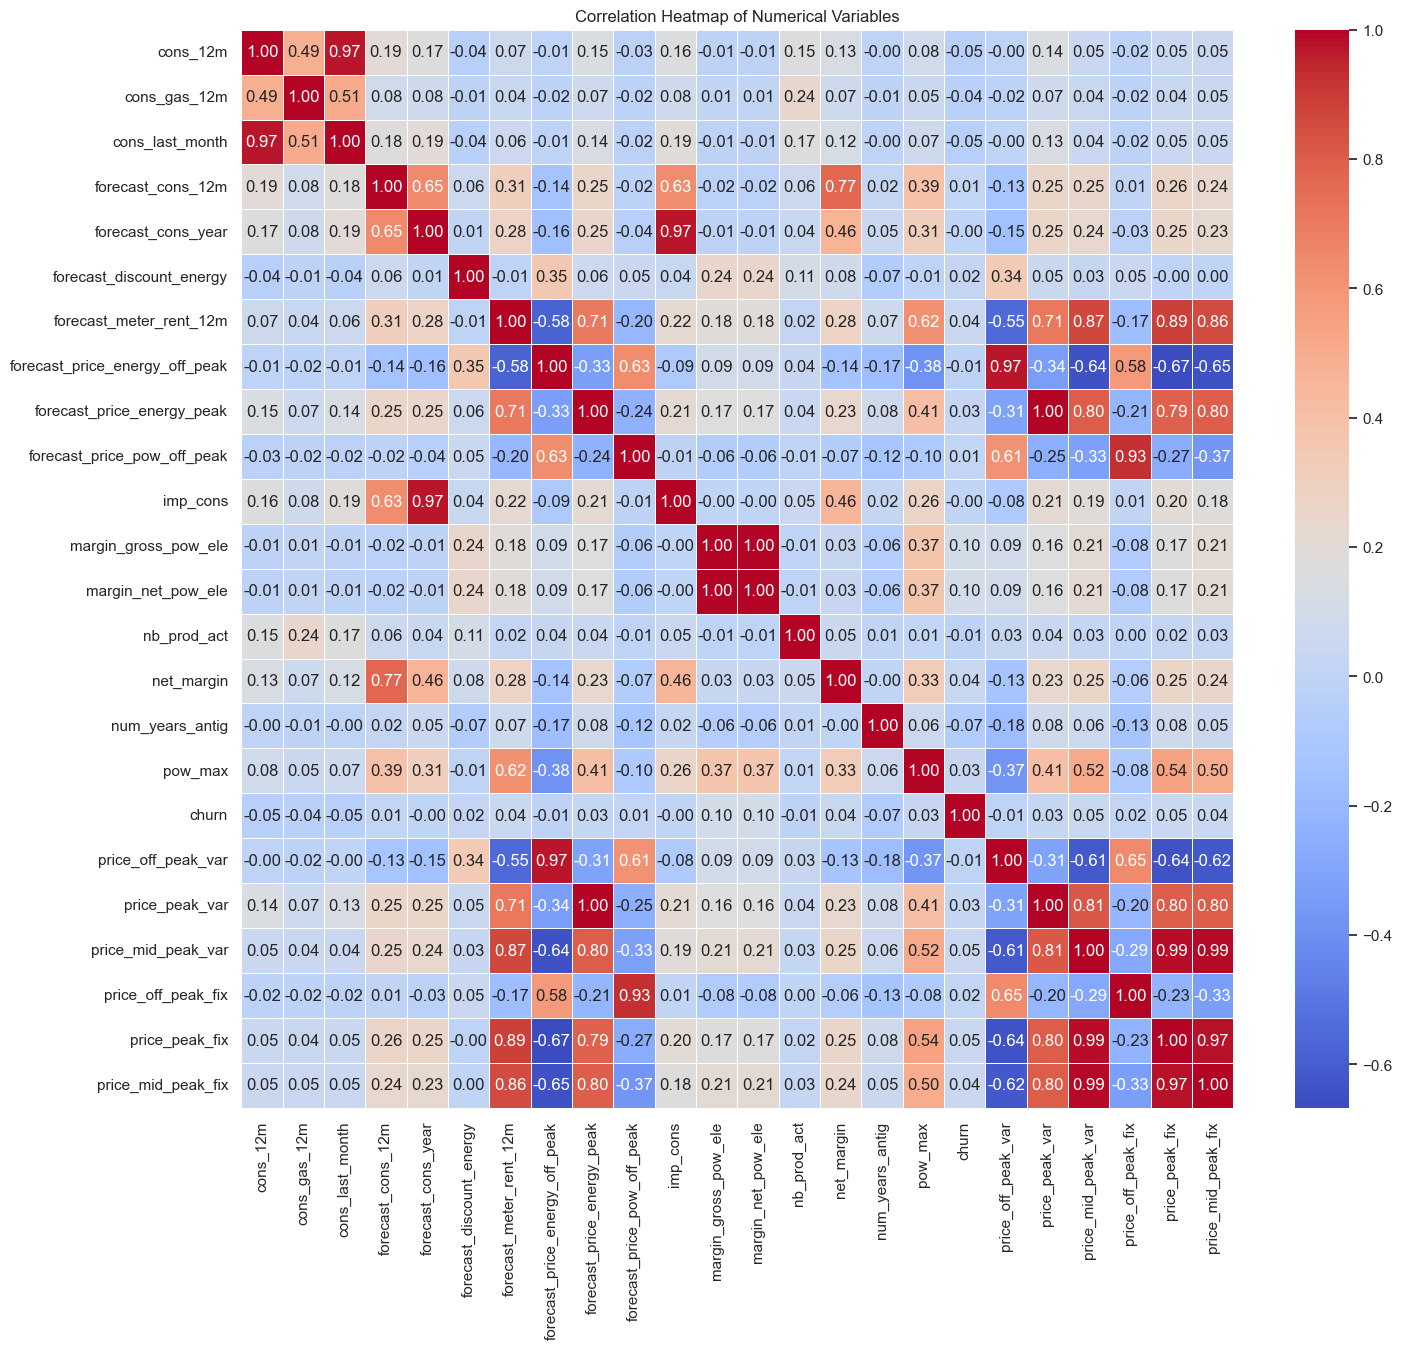

In [40]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The absence of a clear relationship between customer loyalty and price suggests that loyalty may be influenced by factors beyond pricing alone. While price certainly plays a role in customer decision-making, other aspects such as product quality, customer service, brand reputation, and overall value proposition may also significantly impact loyalty. Therefore, to gain deeper insights into the dynamics between price and loyalty, it's essential to delve further into price analysis. This may involve examining pricing strategies, competitive pricing landscapes, price elasticity, customer segmentation based on price sensitivity, and the correlation between pricing changes and customer retention rates. By focusing more on price analysis, the company can uncover nuanced patterns and refine its pricing strategies to better align with customer preferences and enhance loyalty.

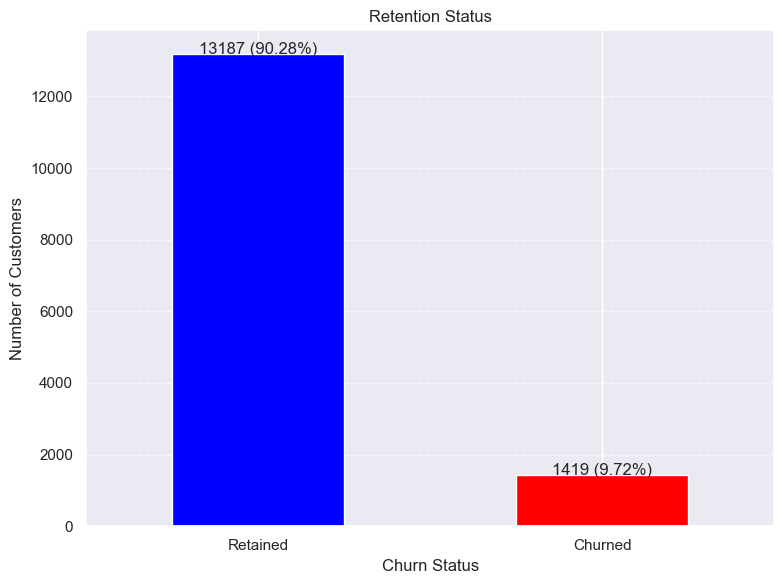

In [41]:
# Group by churn status and count occurrences
churn_counts = merged_df['churn'].value_counts()

# Calculate percentages
total_customers = churn_counts.sum()
churn_percent = churn_counts[1] / total_customers * 100
retain_percent = churn_counts[0] / total_customers * 100

# Plotting
plt.figure(figsize=(8, 6))

# Bar plot for churn status
ax = churn_counts.plot(kind='bar', color=['blue', 'red'])

# Adding labels and title
plt.title('Retention Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with counts and percentages
for i, v in enumerate(churn_counts):
    ax.text(i, v + 3, f"{v} ({round((v / total_customers) * 100, 2)}%)", ha='center')

plt.tight_layout()
plt.show()

### Now, let's Prepeare the data for Feature Engineering

In [42]:
# Filter price data for December and January separately
december_prices = price_df[price_df['price_date'].dt.month == 12]
january_prices = price_df[price_df['price_date'].dt.month == 1]

In [43]:
# Keep only id, price_date, price_off_peak_var, and price_off_peak_fix columns
december_prices = december_prices[['id', 'price_off_peak_var', 'price_off_peak_fix']]
january_prices = january_prices[['id', 'price_off_peak_var', 'price_off_peak_fix']]

In [44]:
# Rename columns
december_prices.rename(columns={'price_off_peak_var': 'dec_price_off_peak_var', 'price_off_peak_fix': 'dec_price_off_peak_fix'}, inplace=True)
january_prices.rename(columns={'price_off_peak_var': 'jan_price_off_peak_var', 'price_off_peak_fix': 'jan_price_off_peak_fix'}, inplace=True)

In [45]:
december_prices.head()

,id,dec_price_off_peak_var,dec_price_off_peak_fix
11,038af19179925da21a25619c5a24b745,0.145859,44.444710
23,31f2ce549924679a3cbb2d128ae9ea43,0.118755,40.728885
35,36b6352b4656216bfdb96f01e9a94b4e,0.113068,40.728885
47,48f3e6e86f7a8656b2c6b6ce2763055e,0.143943,44.444710
59,cce88c7d721430d8bd31f71ae686c91e,0.113827,40.728885


In [46]:
january_prices.head()

,id,jan_price_off_peak_var,jan_price_off_peak_fix
0,038af19179925da21a25619c5a24b745,0.151367,44.266931
12,31f2ce549924679a3cbb2d128ae9ea43,0.125976,40.565969
24,36b6352b4656216bfdb96f01e9a94b4e,0.123086,40.565969
36,48f3e6e86f7a8656b2c6b6ce2763055e,0.144431,44.266931
48,cce88c7d721430d8bd31f71ae686c91e,0.153159,41.063970


In [47]:
dec_jan_prices = pd.merge(december_prices,january_prices, on='id')

In [48]:
dec_jan_prices.head()

,id,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix
0,038af19179925da21a25619c5a24b745,0.145859,44.444710,0.151367,44.266931
1,31f2ce549924679a3cbb2d128ae9ea43,0.118755,40.728885,0.125976,40.565969
2,36b6352b4656216bfdb96f01e9a94b4e,0.113068,40.728885,0.123086,40.565969
3,48f3e6e86f7a8656b2c6b6ce2763055e,0.143943,44.444710,0.144431,44.266931
4,cce88c7d721430d8bd31f71ae686c91e,0.113827,40.728885,0.153159,41.063970


---
## Data For Modelling

In [49]:
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_end_year,date_modif_prod_year,date_renewal_year,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2016,2015,2015,2015-10-16 12:00:00,0.124617,0.096216,0.055364,41.613396,18.327998,12.218666
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,2016,2009,2015,2015-10-16 12:00:00,0.147208,0.021371,0.000000,44.400265,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,2016,2010,2015,2015-10-16 12:00:00,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,2016,2010,2015,2015-10-16 12:00:00,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,2016,2010,2015,2015-10-16 12:00:00,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555


In [50]:
eda_data = pd.merge(merged_df, dec_jan_prices, on='id')

In [51]:
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.124617,0.096216,0.055364,41.613396,18.327998,12.218666,0.146033,44.266930,0.125976,40.565969
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147208,0.021371,0.000000,44.400265,0.000000,0.000000,0.147600,44.444710,0.151367,44.266931
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,0.167798,44.444710,0.172468,44.266931
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,0.148586,44.444710,0.153133,44.266931
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,0.119906,40.728885,0.126098,40.565969


---
## This data is further proceeded with Feature Engineering

In [52]:
eda_data.to_csv('clean_data_after_eda.csv',index=False)

---

### Tenure Analysis

In this analysis, the customer's loyalty tenure is quantified by calculating the difference between the date of activation (`date_active`) and the date of contract end (`date_end`). This duration represents the total number of years the customer has remained engaged with the company's products or services. By using tenure in years as a metric for loyalty, the analysis aims to understand how the length of the customer's relationship with the company influences churn behavior. Longer tenure might indicate stronger loyalty, but it also provides a broader timeframe for potential reasons for churn to emerge, such as changes in needs, preferences, or competitive offerings. By examining churn patterns relative to tenure, the company can identify whether there are particular stages in the customer lifecycle where churn rates are higher or lower, allowing for more targeted retention strategies and better management of customer relationships.

In [53]:
eda_data['years_since_active'] = (eda_data['date_end'] - eda_data['date_activ']).dt.days / 365

In [54]:
eda_data['years_since_active'] = eda_data['years_since_active'].round()

In [55]:
eda_data['date_end'].value_counts()

date_end
2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
             ... 
2017-01-29      1
2017-06-01      1
2017-01-28      1
2017-06-13      1
2017-06-11      1
Name: count, Length: 368, dtype: int64

In [56]:
eda_data['date_activ'].value_counts()

date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2012-02-01    48
              ..
2007-03-16     1
2005-01-28     1
2009-02-01     1
2005-02-14     1
2004-12-29     1
Name: count, Length: 1796, dtype: int64

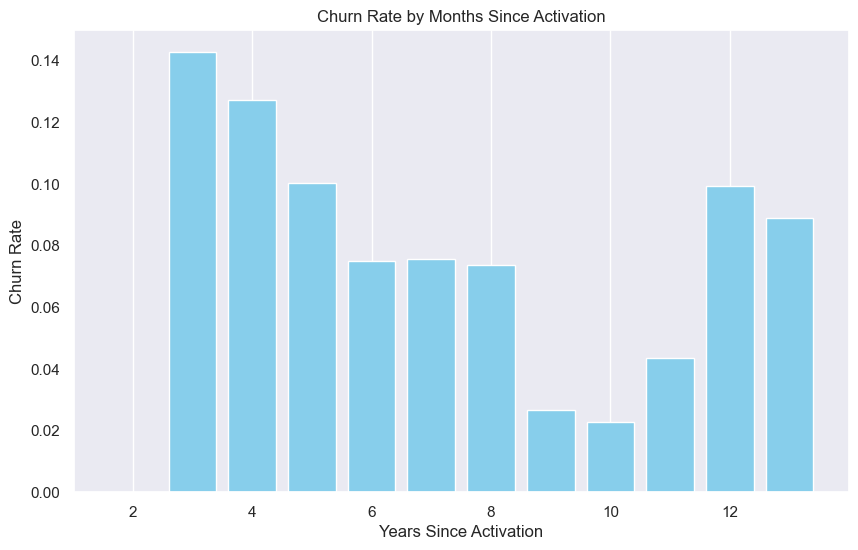

In [57]:
# Group the eda_data by the number of months since activation and calculate the churn rate
churn_rate_by_months = eda_data.groupby('years_since_active')['churn'].mean()

# Plot the churn rate against the number of months since activation
plt.figure(figsize=(10, 6))
plt.bar(churn_rate_by_months.index, churn_rate_by_months.values, color='skyblue')
plt.title('Churn Rate by Months Since Activation')
plt.xlabel('Years Since Activation')
plt.ylabel('Churn Rate')
plt.grid(axis='y')
plt.show()

During their first 2-3 years, customers often exhibit higher churn rates due to initial evaluation, onboarding challenges, and product issues. As familiarity grows and relationships strengthen over time, loyalty increases, leading to lower churn rates in later stages of their tenure.

In [58]:
eda_data.groupby(['years_since_active']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
years_since_active,
3.0,0.142721
4.0,0.127202
5.0,0.100377
12.0,0.099291
13.0,0.088889
7.0,0.075574
6.0,0.074920
8.0,0.073770
11.0,0.043478


---

# Key Findings

**1. About 9.72% of customers changed providers**:
    This indicates a churn rate of approximately 9.72%, meaning that out of the total customer base, nearly 10% switched to a different provider within the given time frame.
    Understanding the churn rate is crucial for businesses as it directly impacts revenue and customer retention efforts. A high churn rate could signify issues with customer satisfaction, service quality, or competitive pricing.

**2. Changes in prices do not affect customer churn**:
    This finding suggests that fluctuations or changes in prices of products or services offered by the provider do not significantly influence customers' decisions to switch to another provider.
    While pricing is often assumed to be a primary factor in customer churn, other factors such as service quality, customer support, convenience, or competitive offerings may play a more significant role in this particular context.

**3. Customers during their first 2-3 years are more likely to churn away**:
    This observation highlights a critical period within the customer lifecycle where churn rates are particularly high.
    New customers, especially within their initial 2-3 years, may still be evaluating the service, forming impressions, or experiencing teething problems. If not adequately engaged or satisfied during this period, they may be more inclined to switch to a competitor.
    This underscores the importance of onboarding processes, early engagement strategies, and ongoing customer support efforts aimed at retaining customers during their initial stages of engagement.

**4. Customer Loyalty**: 
    Customers who purchase multiple products from the same company often demonstrate higher loyalty towards the brand. This loyalty could be driven by factors such as trust in the brand, satisfaction with previous purchases, or the convenience of having multiple products or services from a single provider.

# Suggestions

**1. Customer Retention Strategies**:
    Since approximately 9.72% of customers changed providers, it's crucial to focus on customer retention strategies. Implement loyalty programs, personalized offers, and proactive customer support to enhance customer satisfaction and loyalty.

**2. Understanding Customer Preferences**:
    Although changes in prices don't seem to directly affect customer churn, delve deeper into understanding what factors do influence churn. Conduct surveys or gather feedback to identify underlying reasons for customer churn, such as dissatisfaction with service quality, poor customer service experiences, or better offers from competitors.

**3. Early Customer Engagement**:
    Given that customers during their first 2-3 years are more likely to churn away, prioritize early customer engagement and relationship-building activities. Provide onboarding assistance, tutorials, and resources to help customers derive value from your products or services early on. Consider implementing a proactive outreach program to check in with new customers and address any concerns promptly.

**4. Investment in Customer Experience**:
    Invest in improving overall customer experience across all touchpoints. Ensure seamless interactions, quick resolution of issues, and consistent delivery of value. Happy customers are less likely to churn and more likely to become brand advocates, which can further contribute to customer retention and acquisition efforts.

**5. Offer Incentives for Multi-Product Purchases**:
    Introduce incentives such as loyalty rewards, exclusive offers, or discounts for customers who purchase multiple products. These incentives can incentivize customers to consolidate their purchases with the company and reduce the likelihood of churn.

---